In [2]:
import pandas as pd

train = pd.read_csv('~/Downloads/titanic/train.csv')
test = pd.read_csv('~/Downloads/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived: 0=살아남지 못함, 1=살아남음
Pclass(객실 등급): 1~3
SibSp(siblings and spouses): 친척이나 배우자 수
Parch(parents and children): 부모나 자식 수
Ticket: 티켓 넘버
Fare: 요금
NaN: Not a Data
Embarked: 어느 선착장에서 탔는지

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


survived를 알아내는 게 목표!

In [5]:
train.shape # 891명

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # seaborn 세팅

In [12]:
def bar_chart(ft):
    survived = train[train['Survived']==1][ft].value_counts()
    dead = train[train['Survived']==0][ft].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index= ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

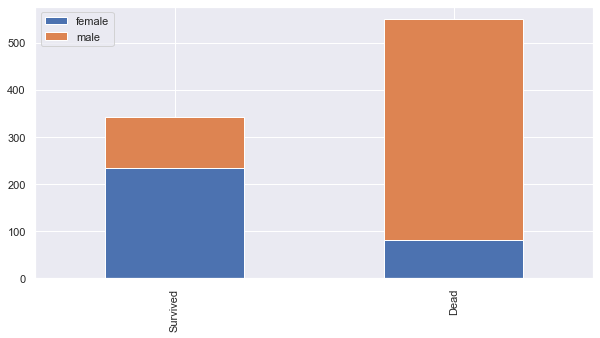

In [13]:
bar_chart('Sex')

여자보다 남자가 더 많이 살아남지 못한 것을 볼 수 있다.
성별에 의한 생존 여부 판단 가능

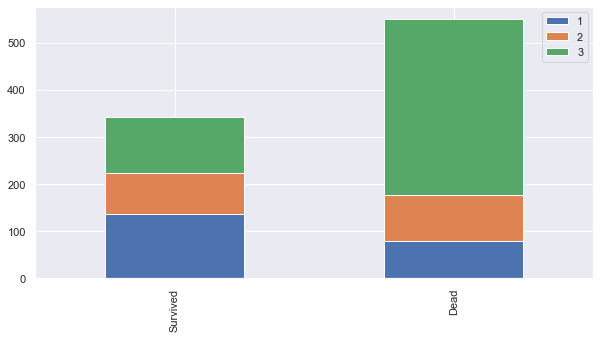

In [14]:
bar_chart('Pclass')

1,2 클래스보다 3클래스의 사람들이 많이 살아 남지 못한 것을 볼 수 있다.
1,2 클래스냐 3클래스냐에 따라 생존 여부 판단 가능

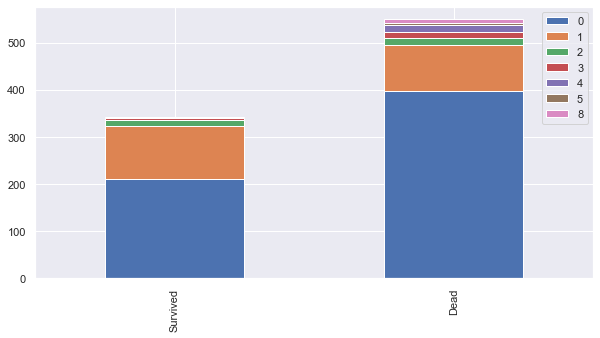

In [15]:
bar_chart('SibSp')

0명일때와 4명이상일 때 살아 남지 못할 확률이 더 크다

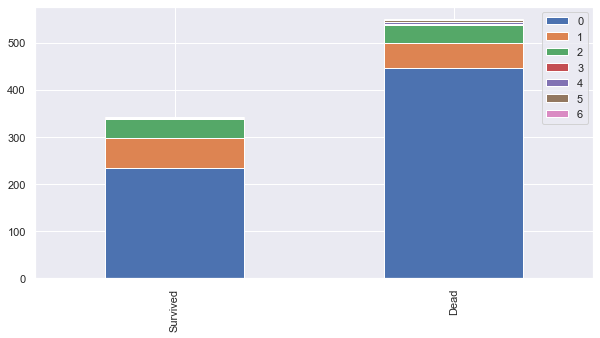

In [16]:
bar_chart('Parch')

0명이거나 3명이상일 때 살아남지 못할 확률이 크다

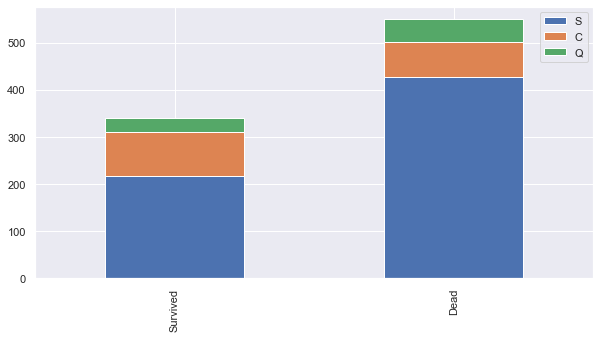

In [17]:
bar_chart('Embarked')

S에서 탔을 경우, 살아 남지 못할 확률이 더 크다

# Feature Engineering

feature vector: feature들을 수치화한 데이터

#### 이름
사실 이름은 그닥 중요하진 않다. 하지만 이름에 붙어있는 Mrs, Mr, Ms 같은 것들은 자녀의 수, 결혼 여부 등 중요한 정보가 될 것 같다

In [18]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [19]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Jonkheer      1
Sir           1
Lady          1
Countess      1
Capt          1
Ms            1
Mme           1
Name: Title, dtype: int64

In [20]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

Mr=0, Miss=1, Mrs=2, Others=3

In [21]:
title_mapping = {'Mr':0, "Miss":1, "Mrs":2, "Master":3,
                 "Dr":3, "Rev":3, "Col":3, "Major":3, "Mlle":3,
                 "Countess":3, "Ms":3, "Lady":3, "Jonkheer":3,"Don":3,
                 "Dona":3, "Mme":3, "Capt":3, "Sir":3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


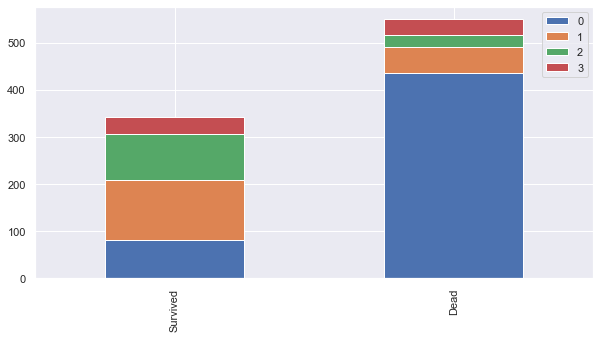

In [24]:
bar_chart('Title')

Mr인 경우 살아남지 못할 확률이 크고, Miss, Mrs 경우 살아남을 확률이 더 크다

In [25]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

#### 성별

In [26]:
sex_mapping = {'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

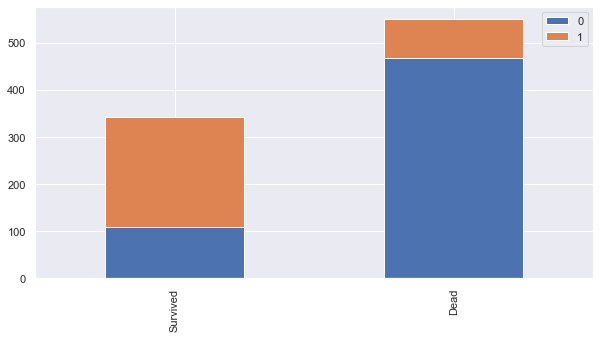

In [27]:
bar_chart('Sex')

male일 경우 살아남지 못할 확률이 크고, female일 경우 살아남을 확률이 더 크다

#### 나이

In [28]:
train['Age'].fillna(train.groupby('Title')["Age"].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

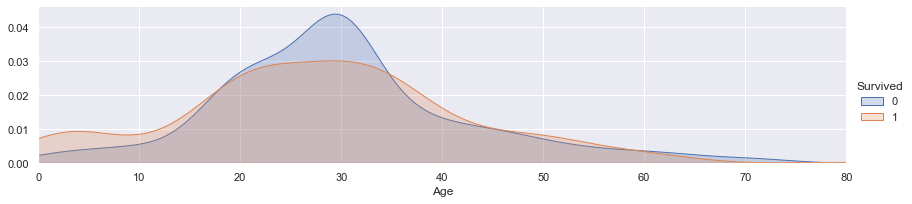

In [29]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

child:0  
young:1  
adult:2  
mid_age:3. 
senior:4. 

In [30]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


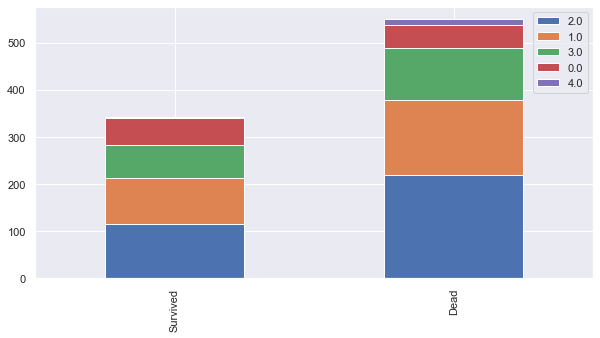

In [32]:
bar_chart('Age')

<AxesSubplot:>

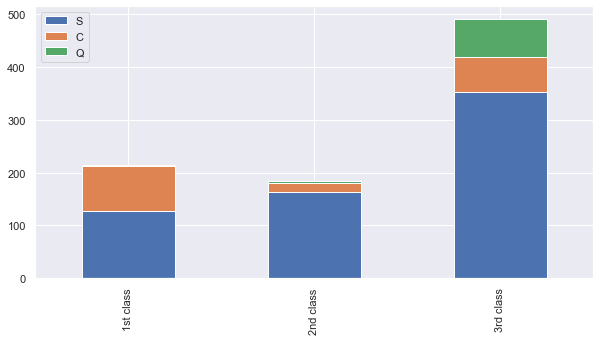

In [33]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

In [34]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [36]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [38]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [39]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [40]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

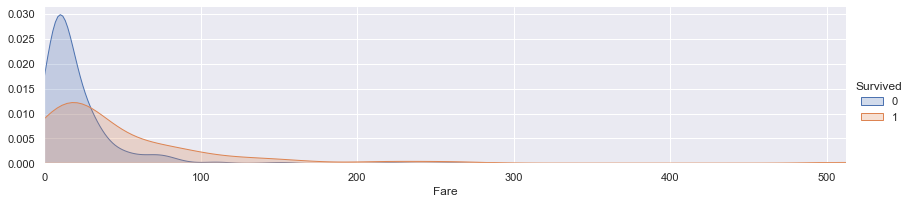

In [41]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

In [42]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3

In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


#### Cavin

In [44]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
F2             3
              ..
D37            1
B86            1
A6             1
C49            1
A20            1
Name: Cabin, Length: 147, dtype: int64

Cavin에 대해서 Pclass가 얼마나 분포되어있는지 보자

In [46]:
for dataset in train_test_data:
    # cavin의 뒤의 숫자는 의미없다고 판단하여,앞의 알파벳만 남겨놓는다
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

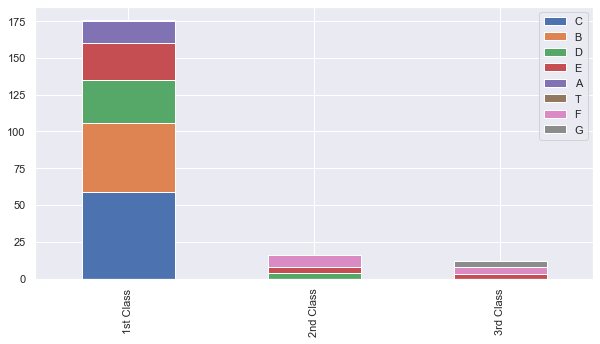

In [47]:
# Pclass가 1인 Cabin 요소만 불러온다
Pc1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
Pc2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
Pc3 = train[train['Pclass'] == 3]['Cabin'].value_counts()
df = pd.DataFrame([Pc1, Pc2, Pc3])
df.index = (['1st Class','2nd Class', '3rd Class'])
df.plot(kind = 'bar', stacked = True, figsize=(10, 5))

앞의 알파벳이 낮을수록 높은 클래스를 쓴다는 것을 알 수 있다

In [48]:
cabin_mapping={'A':0, 'B':0.4,'C':0.8,'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T':2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [49]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace = True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

#### FamilySize

In [50]:
# 가족은 자신 포함(+1) 사촌, 배우자, 부모, 자식을 합한 값으로 구성한다.
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

(0.0, 11.0)

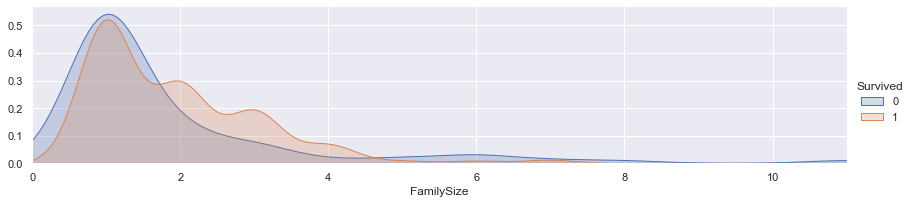

In [53]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade = True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1


In [55]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0,1
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2,2
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0,1
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0,1
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2,3


In [56]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [57]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [58]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,2
1,1,1,3.0,2.0,0.8,1,2,2
2,3,1,1.0,0.0,2.0,0,1,1
3,1,1,2.0,2.0,0.8,0,2,2
4,3,0,2.0,0.0,2.0,0,0,1


## Modeling

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


정제된 학습 데이터다. None값 없이 모두 채워진 것을 확인할 수 있다.

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [62]:
clf=KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.78651685 0.85393258 0.82022472 0.80898876 0.82022472
 0.84269663 0.80898876 0.83146067 0.84269663]


In [63]:
round(np.mean(score)*100, 2)

82.27

In [65]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.80898876 0.76404494 0.7752809  0.8988764  0.76404494
 0.83146067 0.82022472 0.74157303 0.79775281]


In [66]:
round(np.mean(score)*100, 2)

79.69

In [67]:
clf = RandomForestClassifier(n_estimators=13)
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.78651685 0.82022472 0.76404494 0.84269663 0.79775281
 0.83146067 0.82022472 0.75280899 0.84269663]


In [68]:
round(np.mean(score)*100, 2)

80.36

In [69]:
clf = GaussianNB()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [70]:
round(np.mean(score)*100, 2)

78.78

In [71]:
clf = SVC()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.79775281 0.82022472 0.82022472 0.84269663 0.80898876
 0.82022472 0.84269663 0.84269663 0.85393258]


In [72]:
round(np.mean(score)*100, 2)

82.72

In [73]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop('PassengerId', axis=1).copy()

In [74]:
prediction = clf.predict(test_data)

In [75]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": prediction})
submission.to_csv('submission.csv', index=False)

In [77]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
